In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os

import networkx as nx

from utils.utils import *

In [2]:
dict_control

{'name': 'control',
 'sessions': [1, 2],
 'parcs': array([ 100,  200,  500, 1000])}

In [3]:
def create_group_mask(ses, N, percentile_intra, percentile_inter, percentile_subctx, to_save):
    ### Create data_loader
    tmp = data_loader(which='control', ses=ses, parc=N, thr=None, include_subctx=True)
    
    num_subctx = 
    
    ### Load matrices
    ress = []
    for idx, mat in enumerate(tmp):
        if mat is None:
            continue
        ress.append(mat)
    ress = np.stack(ress)
    
    ### Avg matrix
    avg_matrix = ress.mean(axis=0)
    num_nodes = avg_matrix.shape[0]
    
    ### Threshold
    avg_masked = threshold_local(avg_matrix, num_subctx, percentile_intra, percentile_inter, percentile_subctx)
    avg_masked = (avg_masked>0).astype(int)
    
    if not nx.is_connected(nx.from_numpy_array(avg_masked)):
        raise Exception('Mask is not connected.')
        
    if to_save:
        fname = f'mask_ses_{ses}_N_{N}_intra_{percentile_intra}_inter_{percentile_inter}_subctx_{percentile_subctx}.txt'
        np.savetxt('/data/barzon/arm2/mask/'+fname, avg_masked)
        print(f'{fname} saved')
    
    return avg_masked

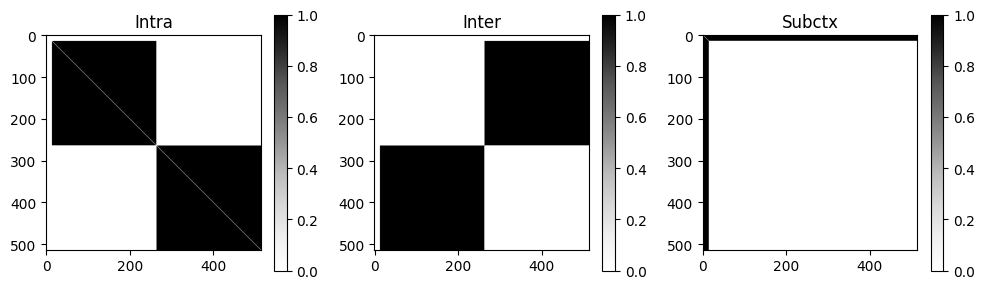

In [4]:
num_ctx = 500
num_subctx = 14

mask_intra, mask_inter, mask_subctx = generate_mask_indexes(num_ctx, num_subctx)

plt.figure(figsize=(10,3))

ax = plt.subplot(1,3,1)
im = ax.imshow(mask_intra, cmap='Greys')
plt.colorbar(im, ax=ax)
ax.set_title('Intra')

ax = plt.subplot(1,3,2)
im = ax.imshow(mask_inter, cmap='Greys')
plt.colorbar(im, ax=ax)
ax.set_title('Inter')

ax = plt.subplot(1,3,3)
im = ax.imshow(mask_subctx, cmap='Greys')
plt.colorbar(im, ax=ax)
ax.set_title('Subctx')

plt.tight_layout()
plt.show()

In [24]:
percentile_intra = 0.8
percentile_inter = 0.85
percentile_subctx = 0.9

for ses in dict_control['sessions']:
    for parc in dict_control['parcs']:
        avg_masked = create_group_mask(ses, parc, percentile_intra, percentile_inter, percentile_subctx, to_save=True)

######## control - ses 01 - parc 100 - total 29 - thr None - subctx True ########
- Loading sub-040
- Loading sub-041
- Loading sub-042
- Loading sub-043
- Loading sub-044
- Loading sub-045
- Loading sub-046
- Loading sub-047
- Loading sub-048
- Loading sub-049
- Loading sub-050
- Loading sub-051
- Loading sub-052
- Loading sub-055
- Loading sub-057
- Loading sub-059
- Loading sub-060
- Loading sub-061
- Loading sub-062
- Loading sub-063
- Loading sub-064
- Loading sub-065
- Loading sub-066
- Loading sub-067
- Loading sub-068
- Loading sub-069
- Loading sub-070
- Loading sub-071
- Loading sub-072
mask_ses_1_N_100_intra_0.8_inter_0.85_subctx_0.9.txt saved
######## control - ses 01 - parc 200 - total 29 - thr None - subctx True ########
- Loading sub-040
- Loading sub-041
- Loading sub-042
- Loading sub-043
- Loading sub-044
- Loading sub-045
- Loading sub-046
- Loading sub-047
- Loading sub-048
- Loading sub-049
- Loading sub-050
- Loading sub-051
- Loading sub-052
- Loading sub-055
- L

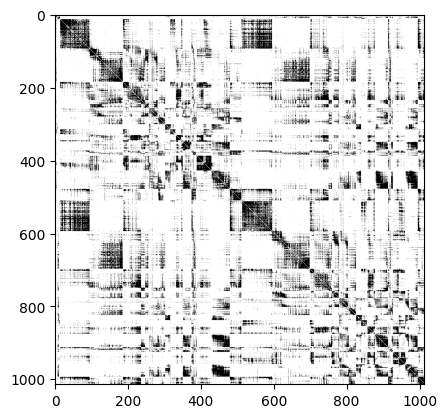

In [17]:
plt.imshow(avg_masked, cmap='Greys')
plt.show()

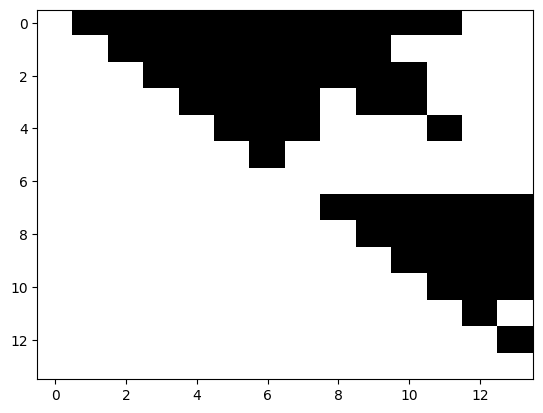

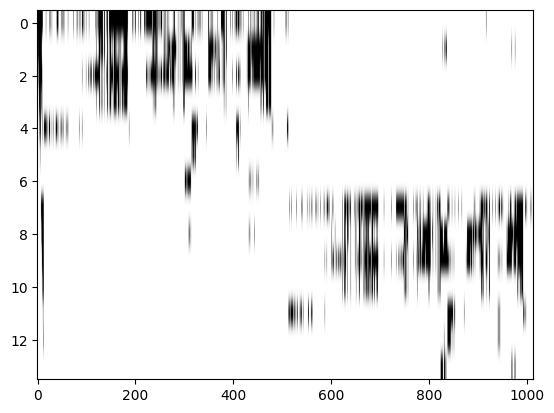

In [19]:
plt.imshow(np.triu(avg_masked[:14,:14]), aspect='auto', cmap='Greys')
plt.show()

plt.imshow(np.triu(avg_masked[:14]), aspect='auto', cmap='Greys')
plt.show()

In [20]:
np.sum(avg_masked, axis=1)[:14]

array([219, 166, 209,  69,  60,  16,  25, 191, 162, 196,  63,  54,  19,
        18])

# Compare masks from the two sessions

In [25]:
parc = 100
intra = 0.8
inter = 0.85
subctx = 0.9

mask1 = np.loadtxt(f'/data/barzon/arm2/mask/mask_ses_{1}_N_{parc}_intra_{intra}_inter_{inter}_subctx_{subctx}.txt')
mask2 = np.loadtxt(f'/data/barzon/arm2/mask/mask_ses_{2}_N_{parc}_intra_{intra}_inter_{inter}_subctx_{subctx}.txt')

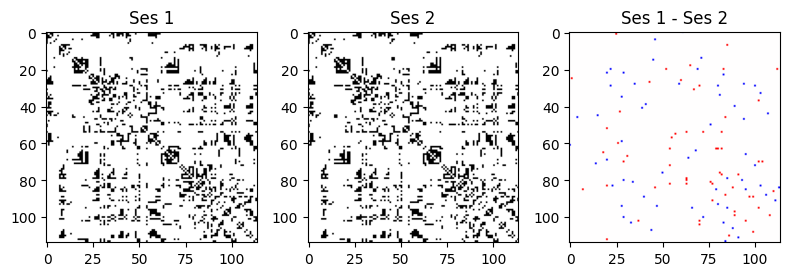

In [26]:
plt.figure(figsize=(8,3))

ax = plt.subplot(1,3,1)
ax.imshow(mask1, cmap='Greys')
ax.set_title('Ses 1')

ax = plt.subplot(1,3,2)
ax.imshow(mask2, cmap='Greys')
ax.set_title('Ses 2')

ax = plt.subplot(1,3,3)
ax.imshow(mask1-mask2, cmap='bwr')
ax.set_title('Ses 1 - Ses 2')

plt.tight_layout()
plt.show()

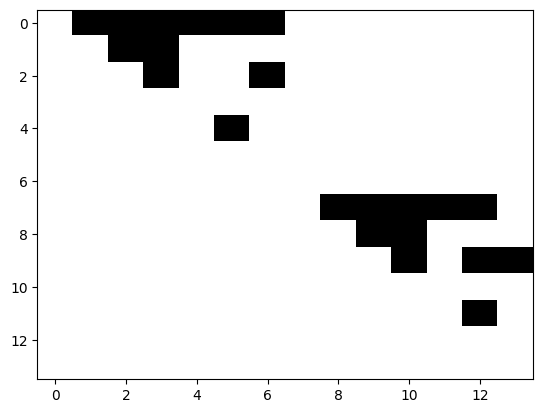

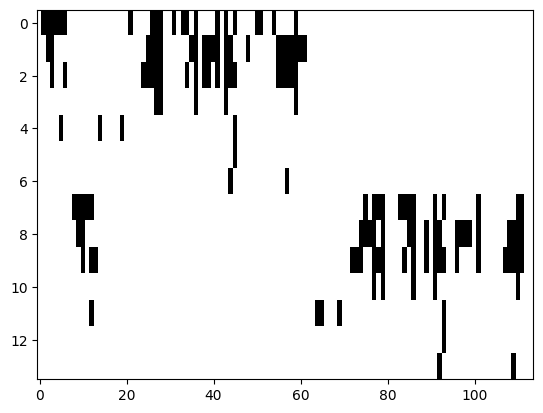

In [27]:
plt.imshow(np.triu(mask1[:14,:14]), aspect='auto', cmap='Greys')
plt.show()

plt.imshow(np.triu(mask1[:14]), aspect='auto', cmap='Greys')
plt.show()

In [4]:
misic = np.load('/home/barzon/Reservoir_computing/Misic/raw_results/conn_results/reliability/scale500/consensus_0.npy')

In [5]:
misic.shape

(1015, 1015)

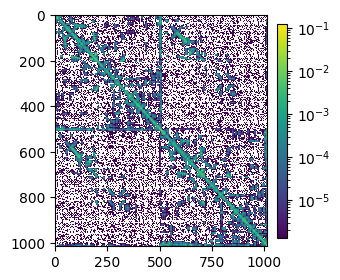

In [6]:
plot_connectome(misic)

In [11]:
misic[500:507]

array([[0.00000000e+00, 0.00000000e+00, 1.19111257e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.16093098e-04, 0.00000000e+00, 5.71257318e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.60946553e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.22360909e-05, 0.00000000e+00, 5.48923746e-02],
       [4.92070463e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.37872090e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.77003991e-04, 2.82819396e-05, 1.41475847e-03]])

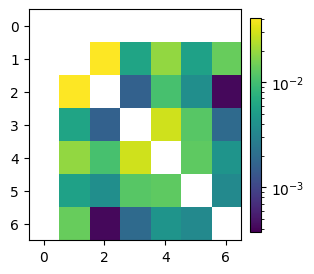

In [10]:
plot_connectome(misic[500:507,500:507])

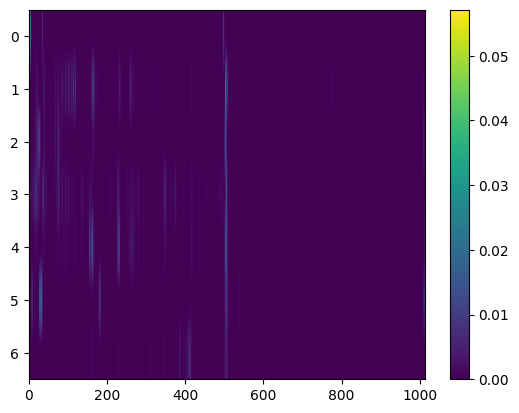

In [11]:
plt.imshow(misic[500:507,:], aspect='auto')
plt.colorbar()
plt.show()

In [14]:
(misic>0).sum(axis=1)[:507]

array([  9,  15,  33,  20,  16,  10,  18,  17,   8,  20,  15,  11,  24,
        18,  19,  32,  14,  36,  19,  28,  27,   8,  11,  31,  12,  12,
        27,  30,  18,   8,   5,   2,  13,   7,  25,  29,  15,  23,  25,
        28,  20,  29,  41,  22,  16,  11,  18,  36,  34,  23,  13,  44,
        37,  23,  26,  34,  27,  24,  25,  22,  10,  26,  19,  20,  29,
        33,  19,  34,  17,  11,  34,  36,  14,  12,  13,  16,  27,  23,
        33,  37,  34,  31,  33,  28,  23,  30,  45,  32,  21,  36,  27,
        30,  32,  27,  31,  30,  31,  23,  25,  35,  37,  54,  20,  30,
        30,  22,  28,  20,  29,  37,  20,  14,  17,  39,  37,  19,  20,
        34,  40,  35,  24,  40,  56,  39,  48,  17,  10,  15,  19,  52,
        29,  11,  15,  20,  15,  18,  25,  15,  23,  11,  12,   8,  24,
        20,  20,  26,  26,  25,  35,  35,  29,  37,  24,   8,  13,  11,
        36,  29,  23,  27,  18,  16,  19,  24,  32,  32,  19,  16,  19,
        21,  27,  18,  22,  12,  24,  29,  17,  15,  22,  17,  1

In [15]:
thr_types = [None, 'local', 'mask']

In [18]:
True in thr_types

False